In [1]:
# Check for GPU
!nvidia-smi

Sun Feb 23 18:19:55 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   62C    P8             10W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [2]:
# Import torch
import torch

# Exercises require PyTorch > 1.10.0
print(torch.__version__)

2.5.1+cu124


1. What are 3 areas in industry where computer vision is currently being used?

- Self-driving, Health Care, Security, airlines, Finance

2. Search "what is overfitting in machine learning" and write down a sentence about what you find.

- creating a model that matches (memorizes) the training set so closely that the model fails to make correct predictions on new data

5. Load the torchvision.datasets.MNIST() train and test datasets.

In [4]:
import torchvision
from torchvision import datasets

from torchvision import transforms


# Get the MNIST train dataset
train_data = datasets.MNIST(root=".",
                            train=True,
                            download=True,
                            transform=transforms.ToTensor())

# Get the MNIST test dataset
test_data = datasets.MNIST(root=".",
                           train=False,
                           download=True,
                           transform=transforms.ToTensor())

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 9.91M/9.91M [00:00<00:00, 17.8MB/s]


Extracting ./MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 28.9k/28.9k [00:00<00:00, 479kB/s]


Extracting ./MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 1.65M/1.65M [00:00<00:00, 4.42MB/s]


Extracting ./MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 4.54k/4.54k [00:00<00:00, 5.95MB/s]

Extracting ./MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST/raw



In [5]:
train_data, test_data

(Dataset MNIST
     Number of datapoints: 60000
     Root location: .
     Split: Train
     StandardTransform
 Transform: ToTensor(),
 Dataset MNIST
     Number of datapoints: 10000
     Root location: .
     Split: Test
     StandardTransform
 Transform: ToTensor())

In [6]:
len(train_data), len(test_data)

(60000, 10000)

In [7]:
# Set the data in tuple form
img = train_data[0][0]
label = train_data[0][1]
print(f"Image:\n {img}")
print(f"Label:\n {label}")

Image:
 tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000,

In [8]:
 #Check out the shapes of our data
print(f"Image shape: {img.shape} -> [color_channels, height, width] (CHW)")
print(f"Label: {label} -> no shape, due to being integer")

Image shape: torch.Size([1, 28, 28]) -> [color_channels, height, width] (CHW)
Label: 5 -> no shape, due to being integer


Color channels first: [color_channels, height, width] (CHW)  -> PyTorch default
Color channels last: [height, width, color_channels] (HWC)  -> Matplotlib/TensorFlow

In [9]:
# we are getting the class name

class_names = train_data.classes
class_names

['0 - zero',
 '1 - one',
 '2 - two',
 '3 - three',
 '4 - four',
 '5 - five',
 '6 - six',
 '7 - seven',
 '8 - eight',
 '9 - nine']

6. Visualize at least 5 different samples of the MNIST training dataset.

torch.Size([1, 28, 28])
torch.Size([28, 28])
torch.Size([1, 28, 28])
torch.Size([28, 28])
torch.Size([1, 28, 28])
torch.Size([28, 28])
torch.Size([1, 28, 28])
torch.Size([28, 28])
torch.Size([1, 28, 28])
torch.Size([28, 28])


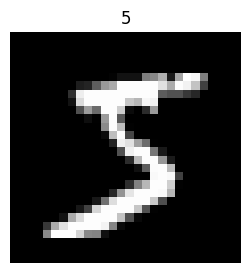

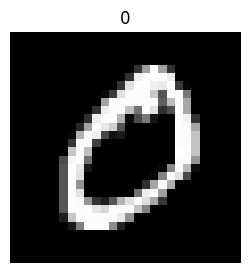

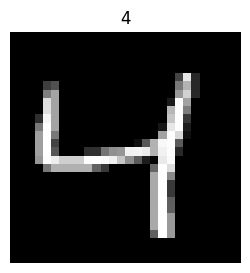

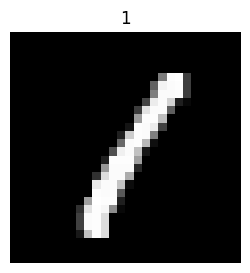

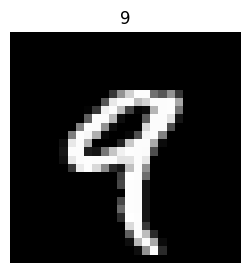

In [12]:
import matplotlib.pyplot as plt
for i in range(5):
  img = train_data[i][0]
  print(img.shape) #here we are print the train_data
  img_squeeze = img.squeeze()
  print(img_squeeze.shape) # We are printing sequence
  label = train_data[i][1]
  plt.figure(figsize=(3, 3))
  plt.imshow(img_squeeze, cmap="gray")
  plt.title(label)
  plt.axis(False);

7. Turn the MNIST train and test datasets into dataloaders using torch.utils.data.DataLoader, set the batch_size=32.

In [13]:
# Create train dataloader
from torch.utils.data import DataLoader

train_dataloader = DataLoader(dataset=train_data,
                              batch_size=32,
                              shuffle=True)

test_dataloader = DataLoader(dataset=test_data,
                             batch_size=32,
                             shuffle=False)
